In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
# plt.style.use('dark_background')
np.random.seed(1)
# Generate data.
# Number of features
num_inputs = 1
# Number of observations
num_examples = 1000
# True parameters
true_w = 3
true_b = 4.2
# Feature Matrix
X = np.random.normal(scale=1, size=(num_examples, num_inputs))
X = np.hstack((np.ones((X.shape[0], 1)), X))
# Label 
y = true_w * X[:, 1] + true_b
# Add noise
y += .01 * np.random.normal(scale=100, size=y.shape)

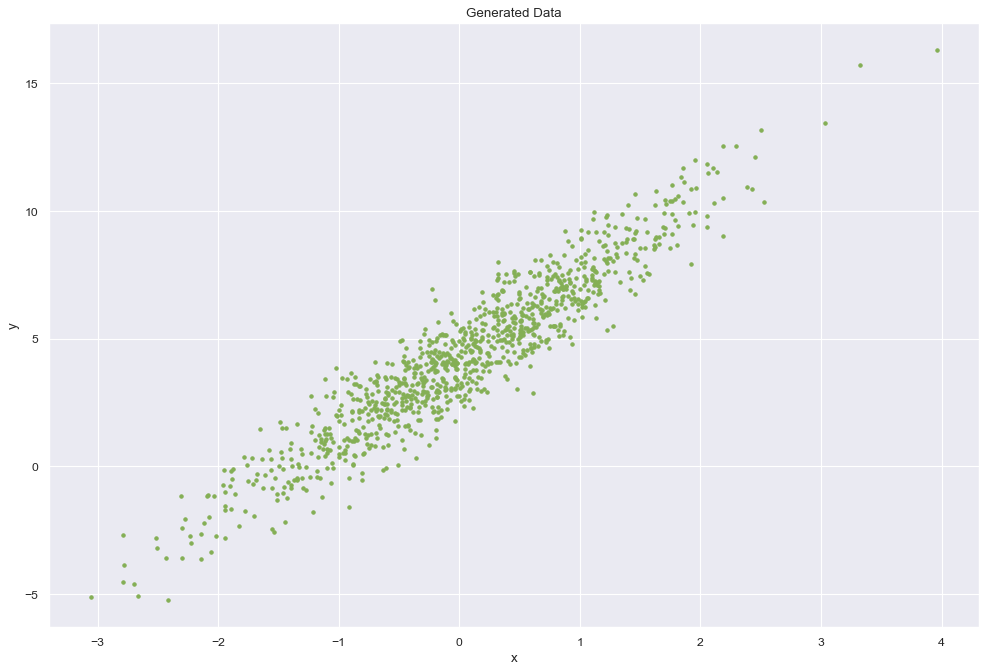

In [10]:
fig1 = plt.figure(figsize = (15,10),dpi = 80)
plt.plot(X[:,1],y,'.', c='#84AF55')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

In [11]:
def sqrt_loss(W):
    error = np.dot(X,W) - y
    #Record the Sum of Squared errors
    loss = np.dot(error,error)/len(X)
    return loss

Final Alpha is [4.12598348 3.1562435 ].


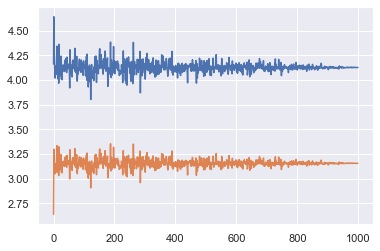

In [16]:
max_iter = 1000
n_wolves = 30
# Initialize the grey wolf population 
wolf_params = [np.random.normal(scale=7,size=2) for _ in range(n_wolves)]
# Evaluate the fitness of each wolf and assign alpha, beta and delta
alpha, beta, delta = sorted(wolf_params, key=sqrt_loss)[:3]
# Initialize a, A, and C
a_params = np.linspace(2, 0, num=max_iter)
weights_history = []
for i, a in enumerate(a_params):
    for i_w, params in enumerate(wolf_params):
        # Update a, A, and C
        A_1 = 2 * a * np.random.rand(1) - a
        A_2 = 2 * a * np.random.rand(1) - a
        A_3 = 2 * a * np.random.rand(1) - a
        C_1 = 2 * np.random.rand(1)
        C_2 = 2 * np.random.rand(1)
        C_3 = 2 * np.random.rand(1)
        # distance to the alpha
        D_alpha = np.abs(C_1 * alpha - params)
        # distance to the beta
        D_beta = np.abs(C_2 * beta - params)
        # distance to the delta
        D_delta = np.abs(C_3 * delta - params)
        X_1 = alpha - A_1 * D_alpha
        X_2 = beta - A_2 * D_beta
        X_3 = delta - A_3 * D_delta
        new_params = (X_1 + X_2 + X_3) / 3
        wolf_params[i_w] = new_params
    # Update the alpha, beta, delta
    alpha, beta, delta = sorted(wolf_params, key=sqrt_loss)[:3]
    weights_history.append(alpha)
print(f'Final Alpha is {alpha}.')
plt.plot(weights_history)
plt.show()

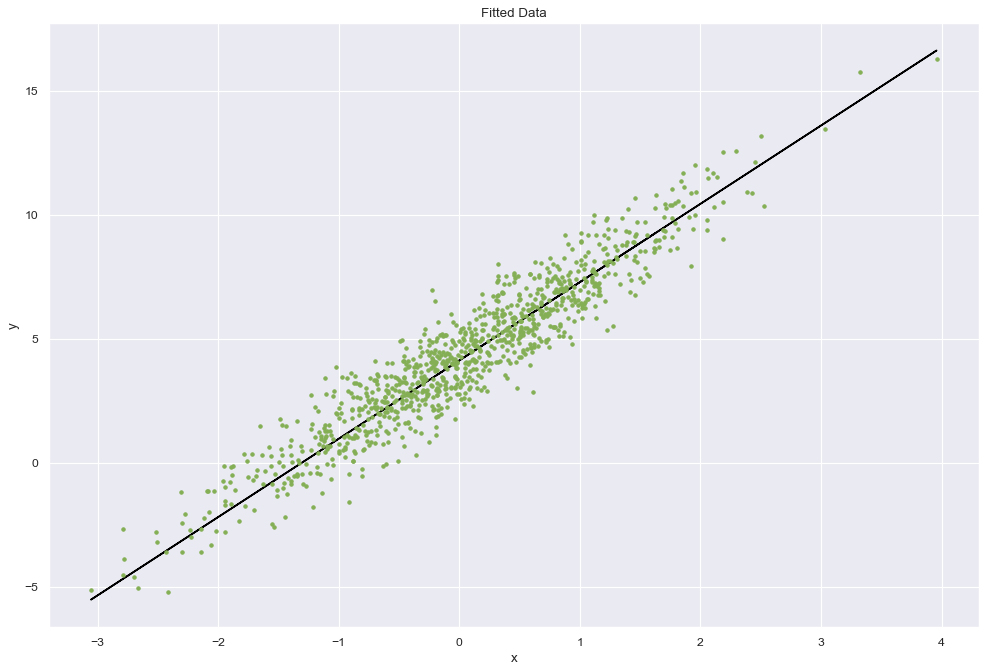

In [19]:
yhats = []
for w in weights_history:
    yhats.append(np.dot(X,w))
fig1 = plt.figure(figsize = (15,10),dpi = 80)
ax1 = fig1.add_subplot(111)
ax1.plot(X[:,1],yhats[-1], color = "black",antialiased=True)

    
ax1.plot(X[:,1],y,'.', color = "#84AF55", alpha = 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Data')
plt.show()

In [4]:
def GWO(max_iter, n_wolves, fitness_fn):
    # Initialize the grey wolf population 
    wolf_params = [np.random.normal(scale=7,size=2) for _ in range(n_wolves)]
    # Evaluate the fitness of each wolf and assign alpha, beta and delta
    alpha, beta, delta = sorted(wolf_params, key=fitness_fn)[:3]
    # Initialize a, A, and C
    a_params = np.linspace(2, 0, num=max_iter)
    for a in a_params:
        for i_w, params in enumerate(wolf_params):
            r1, r2 = np.random.rand(2)
            # Update a, A, and C
            A = 2 * a * r1 - a
            C = 2 * r2
            # distance to the alpha
            D_alpha = np.abs(C * alpha - params)
            # distance to the beta
            D_beta = np.abs(C * beta - params)
            # distance to the delta
            D_delta = np.abs(C * delta - params)
            X_1 = alpha - A * D_alpha
            X_2 = beta - A * D_beta
            X_3 = delta - A * D_delta
            new_params = (X_1 + X_2 + X_3) / 3
            wolf_params[i_w] = new_params
        # Update the alpha, beta, delta
        alpha, beta, delta = sorted(wolf_params, key=fitness_fn)[:3]
    return alpha

In [6]:
GWO(100,30,sqrt_loss)

array([4.17852006, 3.08813443])